# QASM simulator:

## Noisy Quantum Circuit Simulator backend

- Introduction to Qiskit:https://qiskit.org/documentation/intro_tutorial1.html

- First Quantum Program:https://quantum-computing.ibm.com/lab/docs/iql/first-circuit

- Different simulators:https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

- Other References:

    - https://qiskit.org/documentation/apidoc/providers_basicaer.html
    - https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html
    
# 1. [First Quantum Program: Bell state](#qasm_bell)
    - using qasm_simulator(ideal)
# 2. <a href="Bell_state_EX.ipynb">Other Examples with respect to Bell state</a>
# 3. [Bell state on real device which is noisy](#qasm_real)

---

## Points to be noted:

- Real experiment requires the measurement in the Quantum Circuit
- Mesaurement is in the computational basis
- |0> , |1> basis
- Without measurement we cannot get any information
- Measurement collapses the quantum information into classical bits

### Step1: Import the required packages

In [1]:
from qiskit import QuantumCircuit,BasicAer,Aer,transpile,execute, IBMQ
from qiskit.visualization import plot_histogram

# <a id="qasm_bell"> First Quantum Program: Bell Circuit</a>

### Step2: Create a Quantum Circuit
- using 2 one-single qubit gates
- H and CX gate

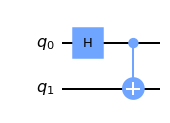

In [2]:
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

### Step3: Mesurement

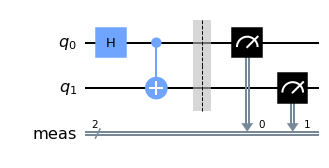

In [3]:
qc.measure_all()
qc.draw(output="mpl")

### Step4: Get the qasm simulator from Aer

In [4]:
backend=Aer.get_backend('qasm_simulator')
backend.name()

'qasm_simulator'

### Step5: Execute the circuit
shots= number of times the experiment/circuit is run

In [5]:
job=execute(qc,backend,shots=1024)

### Step6:  Get the job result: result()

https://qiskit.org/documentation/stubs/qiskit.providers.aer.jobs.AerJob.result.html#qiskit.providers.aer.jobs.AerJob.result

---

In [6]:
result=job.result()

### Step7:  Get the histogram data of the experiement

https://qiskit.org/documentation/stubs/qiskit.result.Result.get_counts.html#qiskit.result.Result.get_counts

In [7]:
counts=result.get_counts()
print(counts)

{'00': 521, '11': 503}


### Step8: Plot the histogram data

- Output obtained is the probabities.
- Probabilities are calculated by taking the individual counts of the state / shots

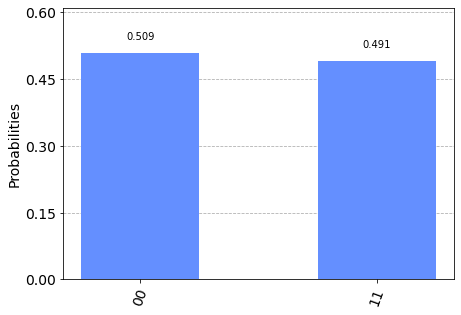

In [8]:
plot_histogram(counts)

## Conclusion:
    The Quantum circuit created is called a Bell state.
    - Both qubits are 50 % having the value 0
    - Both qubits are 50 % having teh value 1
    
https://quantum-computing.ibm.com/admin/docs/admin/guide/entanglement#experiment-with-the-bell-state

### above qasm simulator doesn't contain any noise
### So output obtained is without noise

# Called as maximally entangled quantum state of two qubits

***
# <a id="qasm_real" >Let's take a real device : Real devices are noisy</a>
***
### output contains noisy measurements

{'00': 512, '01': 38, '10': 37, '11': 437}


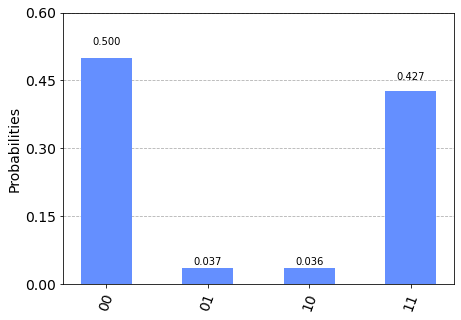

In [9]:
provider=IBMQ.load_account() 

#Get the backend
backend=provider.get_backend('ibmq_bogota')

job=execute(qc,backend,shots=1024)
result=job.result()
counts=result.get_counts()
print(counts)
plot_histogram(counts)

In [11]:
jobID=job.job_id()

In [12]:
jobID

'61e7cae611d037740fabc026'

In [13]:
qc=job.circuits()

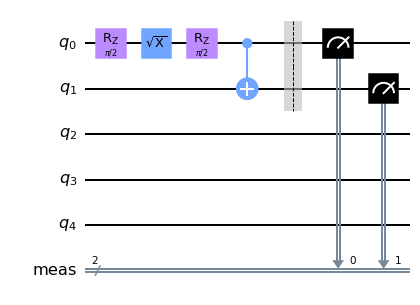

In [17]:
qc[0].draw(output="mpl")